<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment/blob/main/Pycaret_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 117.1 MB/s eta 0:

In [14]:
from pycaret.classification import *
import pandas as pd

df_diabetes = pd.read_csv("/content/diabetes.csv")  # Replace this with the path to your WineQT.csv file

In [15]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
binary_class_setup = setup(df_diabetes, target='Outcome', session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.1290
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0480
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0600
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.3530
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0570
gbc,Gradient Boosting Classifier,0.7373,0.7917,0.5550,0.6445,0.5931,0.4013,0.4059,0.3170
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.2650
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3350
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0600
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.6410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
2,0.7407,0.7038,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.5926,0.5053,0.2105,0.3636,0.2667,0.0116,0.0125
4,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242,0.5259
5,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6296,0.5699,0.3684,0.4667,0.4118,0.1469,0.1491
7,0.8302,0.7770,0.6111,0.8462,0.7097,0.5940,0.6098
8,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8293,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.6852,0.7549,0.4737,0.5625,0.5143,0.2839,0.2862
2,0.7222,0.7962,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.6667,0.6165,0.4211,0.5333,0.4706,0.2322,0.2357
4,0.8148,0.8744,0.6316,0.8000,0.7059,0.5735,0.5820
5,0.6296,0.6271,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6111,0.6248,0.4737,0.4500,0.4615,0.1575,0.1576
7,0.7736,0.7937,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6944,0.5556,0.5000,0.5263,0.2628,0.2636


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8820,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7593,0.8098,0.6316,0.6667,0.6486,0.4658,0.4661
2,0.7593,0.8782,0.4737,0.7500,0.5806,0.4236,0.4456
3,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8148,0.8496,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.6852,0.6699,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7963,0.7850,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7925,0.8603,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.6792,0.6833,0.4444,0.5333,0.4848,0.2548,0.2570


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3639,0.1843,0.4293,0.2365,0.2949,0.4868
1,0.3565,0.1667,0.4082,-0.0274,0.3024,0.5307
2,0.3606,0.1884,0.4340,0.2296,0.2980,0.4811
3,0.3797,0.2037,0.4514,0.1428,0.3108,0.5237
4,0.3063,0.1222,0.3496,0.4500,0.2512,0.4117
5,0.3097,0.1397,0.3737,0.2727,0.2744,0.4095
6,0.2972,0.1544,0.3930,0.3378,0.2595,0.4492
7,0.3529,0.1735,0.4165,0.2748,0.2932,0.4336
8,0.3206,0.1489,0.3858,0.3363,0.2705,0.4637


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_rf = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8827,0.6842,0.6500,0.6667,0.4785,0.4788
1,0.7407,0.8391,0.8947,0.5862,0.7083,0.4926,0.5286
2,0.7778,0.8992,0.7895,0.6522,0.7143,0.5352,0.5417
3,0.7407,0.7729,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.8333,0.8872,0.8421,0.7273,0.7805,0.6473,0.6518
5,0.6296,0.7203,0.5263,0.4762,0.5000,0.2070,0.2077
6,0.7593,0.7865,0.7368,0.6364,0.6829,0.4906,0.4940
7,0.8113,0.8571,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.6415,0.7095,0.5556,0.4762,0.5128,0.2319,0.2336


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


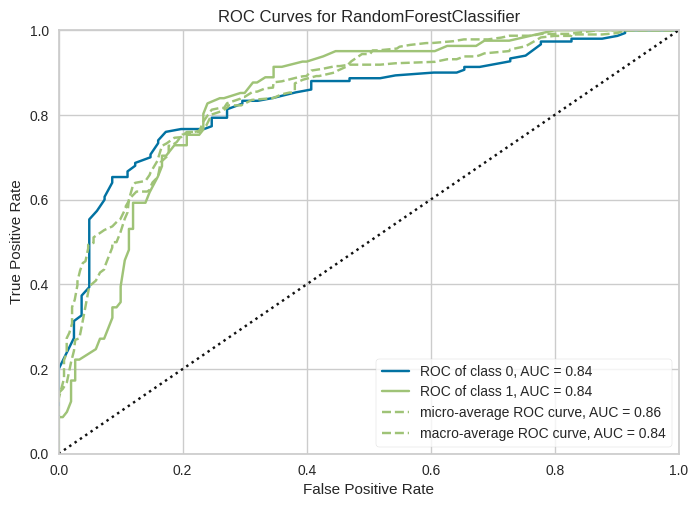

In [22]:
plot_model(tuned_rf, plot = 'auc')

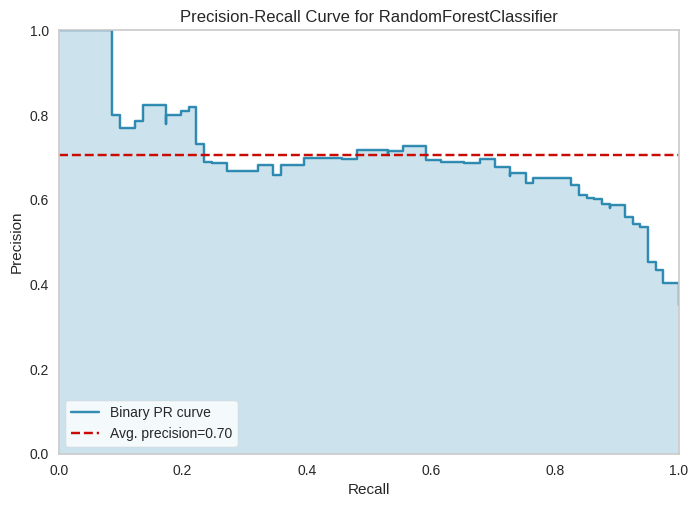

In [23]:
plot_model(tuned_rf, plot = 'pr')

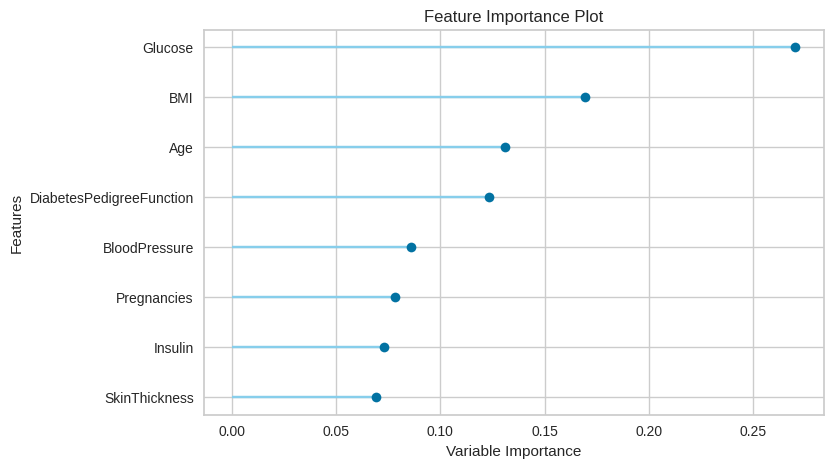

In [24]:
plot_model(tuned_rf, plot = 'feature')

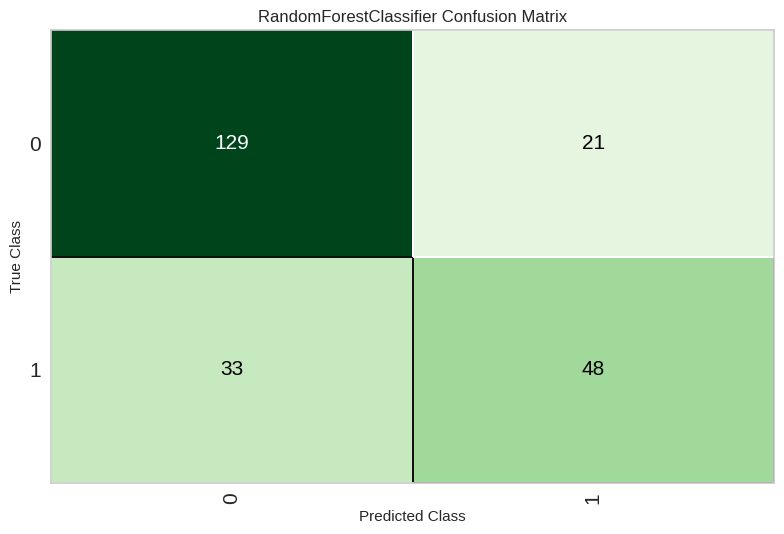

In [25]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7662,0.8404,0.5926,0.6957,0.6400,0.4686,0.4719
